### features:


In [1]:
import pandas as pd 
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import auc
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, recall_score
import matplotlib.pyplot as plt
import itertools

In [2]:
path = "/Users/ecem/Desktop/phonocardiogram/data/binary/AV"

## absent

In [3]:
absent_time_domain = pd.read_csv(path + "/absent_time_domain.csv", index_col = 0)
absent_statistical = pd.read_csv(path + "/absent_statistical.csv", index_col = 0)
absent_fractal = pd.read_csv(path + "/absent_mock_features.csv", index_col = 0)
absent_bandpower = pd.read_csv(path + "/absent_bandpower_and_peaks.csv", index_col = 0)
absent_shan_ent = pd.read_csv(path + "/absent_shannon.csv", index_col = 0)
absent_norm_peak = pd.read_csv(path + "/absent_normalized_peaks.csv", index_col = 0)

In [4]:
absent_features = pd.concat([absent_statistical, 
                             absent_time_domain, 
                             absent_fractal, 
                             absent_bandpower, 
                             absent_shan_ent, absent_norm_peak], axis = 1)
absent_features

,std,kurtosis,harmonic mean,ac peak height mean,energy,spectral entropy,spectral rolloff,spectral centorid,bandpower,petrosian f.a.,...,26'th bandpower,27'th bandpower,28'th bandpower,approx,lvl5,lvl4,lvl3,lvl2,lvl1,ac num of peaks
0,0.047468,4.008844,9.133927e-09,1.760248,0.002254,0.071787,0.05505,0.047869,0.000318,1.002550,...,2.724183e-14,6.327039e-15,8.109496e-16,7.128541,7.121907,7.817359,8.515021,9.209285,9.903693,68.0
1,0.043495,11.998997,3.546310e-10,0.986747,0.001892,0.095646,0.05680,0.046744,0.000302,1.002794,...,3.600292e-14,8.277378e-15,1.031748e-15,7.132136,7.133652,7.822999,8.517077,9.210149,9.903751,41.0
2,0.032711,8.158025,3.581994e-10,0.709413,0.001070,0.049112,0.05395,0.041128,0.000145,1.002596,...,1.425574e-14,3.347236e-15,4.248359e-16,7.134506,7.129689,7.818758,8.517084,9.207334,9.903764,58.0
3,0.035711,4.388212,3.277813e-09,1.056693,0.001276,0.019241,0.05245,0.041156,0.000147,1.002491,...,2.047324e-14,4.810262e-15,5.972775e-16,7.112547,7.128353,7.815709,8.516913,9.210057,9.903766,54.0
4,0.026210,7.420183,1.183629e-09,0.517541,0.000687,0.095409,0.05500,0.049410,0.000093,1.002801,...,1.166309e-14,2.738178e-15,3.404845e-16,7.128591,7.130620,7.825389,8.517042,9.209287,9.903744,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6975,0.024940,51.780026,4.174179e-11,0.326455,0.000623,0.595304,0.10840,0.066223,0.000316,1.003847,...,1.743563e-14,3.728060e-15,4.914745e-16,7.136604,7.136405,7.824924,8.516719,9.209987,9.903694,15.0
6976,0.016788,92.880627,4.800422e-10,0.221183,0.000287,0.311879,0.08725,0.053880,0.000052,1.004066,...,4.751444e-15,1.049159e-15,1.325548e-16,7.137954,7.140584,7.827932,8.511804,9.207716,9.903757,17.0
6977,0.014002,8.048801,6.033321e-09,0.268456,0.000201,0.308364,0.08030,0.059191,0.000032,1.003839,...,3.681776e-15,8.587968e-16,1.067953e-16,7.127044,7.137217,7.822673,8.516610,9.208660,9.903756,23.0
6978,0.015721,9.336197,9.215009e-09,0.192344,0.000250,0.168473,0.03455,0.049848,0.000020,1.003816,...,4.167502e-15,9.827124e-16,1.207894e-16,7.130182,7.128075,7.823602,8.512941,9.205834,9.903758,73.0


## present

In [5]:
present_time_domain = pd.read_csv(path + "/present_time_domain.csv", index_col = 0)
present_statistical = pd.read_csv(path + "/present_statistical.csv", index_col = 0)
present_fractal = pd.read_csv(path + "/present_mock_features.csv", index_col = 0)
present_bandpower = pd.read_csv(path + "/present_bandpower_and_peak.csv", index_col = 0)
present_shan_ent = pd.read_csv(path + "/present_shannon.csv", index_col = 0)
present_norm_peak = pd.read_csv(path + "/present_normalized_peaks.csv", index_col = 0)

In [6]:
present_features = pd.concat([present_statistical, 
                             present_time_domain, 
                             present_fractal, 
                             present_bandpower, 
                             present_shan_ent, present_norm_peak], axis = 1)
present_features

,std,kurtosis,harmonic mean,ac peak height mean,energy,spectral entropy,spectral rolloff,spectral centorid,bandpower,petrosian f.a.,...,26'th bandpower,27'th bandpower,28'th bandpower,approx,lvl5,lvl4,lvl3,lvl2,lvl1,ac num of peaks
0,0.060224,51.817342,4.405790e-10,2.167401,0.003627,0.188441,0.07420,0.053309,0.001371,1.002736,...,3.271238e-14,7.560295e-15,9.672206e-16,6.332259,6.229442,6.475745,7.444101,8.316431,8.943274,64.0
1,0.027385,2.901926,1.058298e-08,0.825860,0.000750,0.043663,0.04800,0.042804,0.000066,1.002308,...,1.162113e-14,2.702502e-15,3.390508e-16,6.702363,6.629805,7.401528,8.117037,8.834056,9.352706,126.0
2,0.019704,4.582113,2.210099e-09,0.303073,0.000388,0.017348,0.04395,0.034369,0.000024,1.002273,...,5.290868e-15,1.248620e-15,1.559593e-16,6.568780,6.603271,7.456561,8.205790,8.910208,9.349056,89.0
3,0.022971,3.136028,4.928371e-09,0.467023,0.000528,0.025138,0.04730,0.037526,0.000038,1.002218,...,8.847740e-15,2.087383e-15,2.573168e-16,6.617825,6.666370,7.387099,8.053108,8.692856,9.210390,127.0
4,0.026843,4.079496,1.251589e-11,0.599395,0.000721,0.029182,0.04545,0.041871,0.000043,1.002254,...,1.378203e-14,3.249271e-15,4.029512e-16,6.588070,6.663248,7.417582,7.989165,8.619781,9.159248,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1240,0.069700,4.866047,2.078173e-08,7.022980,0.004858,0.072016,0.01065,0.034953,0.000084,1.002914,...,7.145767e-14,1.715707e-14,2.102312e-15,6.646903,6.631938,7.112169,7.720889,8.430571,7.781377,39.0
1241,0.089558,7.927406,1.564200e-08,8.178963,0.008021,0.054700,0.01220,0.030964,0.000134,1.002629,...,1.321406e-13,3.165776e-14,3.874504e-15,6.601840,6.507274,6.950059,7.667549,8.379178,8.242596,22.0
1242,0.089493,2.549026,4.151414e-08,13.439792,0.008009,0.069861,0.01200,0.035854,0.000113,1.002242,...,1.317217e-13,3.139730e-14,3.890403e-15,6.680540,6.627028,6.999328,7.535303,8.238698,5.955468,34.0
1243,0.100999,4.374774,1.060101e-12,15.628110,0.010201,0.061103,0.01205,0.047309,0.000171,1.002314,...,1.516126e-13,3.636161e-14,4.466815e-15,6.634735,6.508259,6.850771,7.516241,8.212043,6.636245,80.0


## concat features

In [7]:
df = pd.concat([present_features, absent_features], axis = 0) 
df

,std,kurtosis,harmonic mean,ac peak height mean,energy,spectral entropy,spectral rolloff,spectral centorid,bandpower,petrosian f.a.,...,26'th bandpower,27'th bandpower,28'th bandpower,approx,lvl5,lvl4,lvl3,lvl2,lvl1,ac num of peaks
0,0.060224,51.817342,4.405790e-10,2.167401,0.003627,0.188441,0.07420,0.053309,0.001371,1.002736,...,3.271238e-14,7.560295e-15,9.672206e-16,6.332259,6.229442,6.475745,7.444101,8.316431,8.943274,64.0
1,0.027385,2.901926,1.058298e-08,0.825860,0.000750,0.043663,0.04800,0.042804,0.000066,1.002308,...,1.162113e-14,2.702502e-15,3.390508e-16,6.702363,6.629805,7.401528,8.117037,8.834056,9.352706,126.0
2,0.019704,4.582113,2.210099e-09,0.303073,0.000388,0.017348,0.04395,0.034369,0.000024,1.002273,...,5.290868e-15,1.248620e-15,1.559593e-16,6.568780,6.603271,7.456561,8.205790,8.910208,9.349056,89.0
3,0.022971,3.136028,4.928371e-09,0.467023,0.000528,0.025138,0.04730,0.037526,0.000038,1.002218,...,8.847740e-15,2.087383e-15,2.573168e-16,6.617825,6.666370,7.387099,8.053108,8.692856,9.210390,127.0
4,0.026843,4.079496,1.251589e-11,0.599395,0.000721,0.029182,0.04545,0.041871,0.000043,1.002254,...,1.378203e-14,3.249271e-15,4.029512e-16,6.588070,6.663248,7.417582,7.989165,8.619781,9.159248,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6975,0.024940,51.780026,4.174179e-11,0.326455,0.000623,0.595304,0.10840,0.066223,0.000316,1.003847,...,1.743563e-14,3.728060e-15,4.914745e-16,7.136604,7.136405,7.824924,8.516719,9.209987,9.903694,15.0
6976,0.016788,92.880627,4.800422e-10,0.221183,0.000287,0.311879,0.08725,0.053880,0.000052,1.004066,...,4.751444e-15,1.049159e-15,1.325548e-16,7.137954,7.140584,7.827932,8.511804,9.207716,9.903757,17.0
6977,0.014002,8.048801,6.033321e-09,0.268456,0.000201,0.308364,0.08030,0.059191,0.000032,1.003839,...,3.681776e-15,8.587968e-16,1.067953e-16,7.127044,7.137217,7.822673,8.516610,9.208660,9.903756,23.0
6978,0.015721,9.336197,9.215009e-09,0.192344,0.000250,0.168473,0.03455,0.049848,0.000020,1.003816,...,4.167502e-15,9.827124e-16,1.207894e-16,7.130182,7.128075,7.823602,8.512941,9.205834,9.903758,73.0


## labels

In [8]:
y = np.concatenate((np.ones(1245), np.zeros(6980)), axis =0)
y.shape

(8225,)

## Without threshold

In [9]:
X_train_, X_valid_, y_train_, y_valid_ = train_test_split(df, y, train_size=0.8, test_size=0.2,
                                                                random_state=42)

In [10]:
import xgboost as xgb

clf = xgb.XGBClassifier(objective= "binary:logistic", eval_metric = "logloss")


In [11]:
clf.fit(X_train_, y_train_)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [12]:
yhat = clf.predict(X_valid_)

In [13]:
yhat.shape

(1645,)

In [14]:
y_valid_.shape

(1645,)

In [15]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_valid_, yhat)
print("accuracy: %.2f%%" % (accuracy * 100.0))

accuracy: 100.00%


In [16]:
from sklearn.metrics import recall_score
recall = recall_score(y_valid_, yhat, average= 'weighted')
print("recall: %.2f%%" % (recall * 100.0))


recall: 100.00%


In [17]:
from sklearn.metrics import precision_score
precision = precision_score(y_valid_, yhat, average= 'weighted')
print("precision: %.2f%%" % (precision * 100.0))

precision: 100.00%


In [18]:
from sklearn.metrics import roc_auc_score
score = roc_auc_score(y_valid_, yhat)
print(f"ROC AUC: {score:.4f}")

ROC AUC: 1.0000


/Users/ecem/miniforge3/envs/tf-metal/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


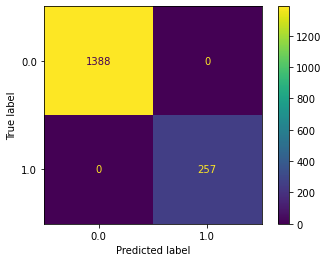

In [19]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_valid_, y_valid_) 

In [20]:
names =["absent", "present"]
print(classification_report(y_valid_, yhat, target_names = names))

              precision    recall  f1-score   support

      absent       1.00      1.00      1.00      1388
     present       1.00      1.00      1.00       257

    accuracy                           1.00      1645
   macro avg       1.00      1.00      1.00      1645
weighted avg       1.00      1.00      1.00      1645



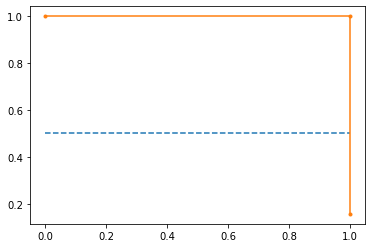

AUC: 1.000


In [21]:
precision, recall, thresholds = precision_recall_curve(y_valid_, yhat)
auc_score = auc(recall, precision)
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.show()
print('AUC: %.3f' % auc_score)

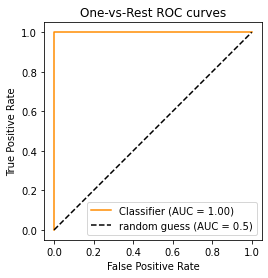

In [22]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(
    y_valid_,
    yhat,
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="random guess (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves")
plt.legend()


[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.99787915 0.         0.00212087 0.         0.
 0.         0.        ]


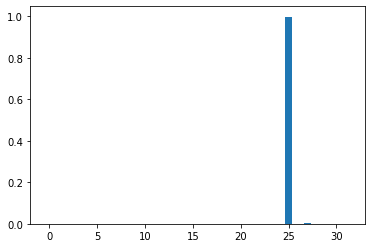

In [23]:
print(clf.feature_importances_)
# plot
plt.bar(range(len(clf.feature_importances_)), clf.feature_importances_)
plt.show()

### train without the most important feature

In [24]:
df.columns[25]

'approx'

In [25]:
df_ap= df.drop(["approx"], axis=1)
df_ap

,std,kurtosis,harmonic mean,ac peak height mean,energy,spectral entropy,spectral rolloff,spectral centorid,bandpower,petrosian f.a.,...,25'th bandpower,26'th bandpower,27'th bandpower,28'th bandpower,lvl5,lvl4,lvl3,lvl2,lvl1,ac num of peaks
0,0.060224,51.817342,4.405790e-10,2.167401,0.003627,0.188441,0.07420,0.053309,0.001371,1.002736,...,1.567410e-13,3.271238e-14,7.560295e-15,9.672206e-16,6.229442,6.475745,7.444101,8.316431,8.943274,64.0
1,0.027385,2.901926,1.058298e-08,0.825860,0.000750,0.043663,0.04800,0.042804,0.000066,1.002308,...,5.451163e-14,1.162113e-14,2.702502e-15,3.390508e-16,6.629805,7.401528,8.117037,8.834056,9.352706,126.0
2,0.019704,4.582113,2.210099e-09,0.303073,0.000388,0.017348,0.04395,0.034369,0.000024,1.002273,...,2.406857e-14,5.290868e-15,1.248620e-15,1.559593e-16,6.603271,7.456561,8.205790,8.910208,9.349056,89.0
3,0.022971,3.136028,4.928371e-09,0.467023,0.000528,0.025138,0.04730,0.037526,0.000038,1.002218,...,4.033335e-14,8.847740e-15,2.087383e-15,2.573168e-16,6.666370,7.387099,8.053108,8.692856,9.210390,127.0
4,0.026843,4.079496,1.251589e-11,0.599395,0.000721,0.029182,0.04545,0.041871,0.000043,1.002254,...,6.282048e-14,1.378203e-14,3.249271e-15,4.029512e-16,6.663248,7.417582,7.989165,8.619781,9.159248,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6975,0.024940,51.780026,4.174179e-11,0.326455,0.000623,0.595304,0.10840,0.066223,0.000316,1.003847,...,1.010362e-13,1.743563e-14,3.728060e-15,4.914745e-16,7.136405,7.824924,8.516719,9.209987,9.903694,15.0
6976,0.016788,92.880627,4.800422e-10,0.221183,0.000287,0.311879,0.08725,0.053880,0.000052,1.004066,...,2.548142e-14,4.751444e-15,1.049159e-15,1.325548e-16,7.140584,7.827932,8.511804,9.207716,9.903757,17.0
6977,0.014002,8.048801,6.033321e-09,0.268456,0.000201,0.308364,0.08030,0.059191,0.000032,1.003839,...,1.750411e-14,3.681776e-15,8.587968e-16,1.067953e-16,7.137217,7.822673,8.516610,9.208660,9.903756,23.0
6978,0.015721,9.336197,9.215009e-09,0.192344,0.000250,0.168473,0.03455,0.049848,0.000020,1.003816,...,1.914232e-14,4.167502e-15,9.827124e-16,1.207894e-16,7.128075,7.823602,8.512941,9.205834,9.903758,73.0


In [26]:
X_train_, X_valid_, y_train_, y_valid_ = train_test_split(df_ap, y , train_size=0.8, test_size=0.2,
                                                                random_state=42)

In [27]:
clf = xgb.XGBClassifier(objective= "binary:logistic")

In [28]:
clf.fit(X_train_, y_train_)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [29]:
yhat = clf.predict(X_valid_)

In [30]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_valid_, yhat)
print("accuracy: %.2f%%" % (accuracy * 100.0))

from sklearn.metrics import recall_score
recall = recall_score(y_valid_, yhat, average= 'weighted')
print("recall: %.2f%%" % (recall * 100.0))

from sklearn.metrics import precision_score
precision = precision_score(y_valid_, yhat, average= 'weighted')
print("precision: %.2f%%" % (precision * 100.0))

names =["absent", "present"]
print(classification_report(y_valid_, yhat, target_names = names))

accuracy: 100.00%
recall: 100.00%
precision: 100.00%
              precision    recall  f1-score   support

      absent       1.00      1.00      1.00      1388
     present       1.00      1.00      1.00       257

    accuracy                           1.00      1645
   macro avg       1.00      1.00      1.00      1645
weighted avg       1.00      1.00      1.00      1645



## With threshold

In [31]:
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(threshold =  0.0001)   # düşük  threshold
_ = vt.fit(df)
masked = vt.get_support()
features_masked = df.loc[:, masked]

In [32]:
features_masked = df.iloc[:, 1:7]

In [33]:
features_masked

,kurtosis,harmonic mean,ac peak height mean,energy,spectral entropy,spectral rolloff
0,51.817342,4.405790e-10,2.167401,0.003627,0.188441,0.07420
1,2.901926,1.058298e-08,0.825860,0.000750,0.043663,0.04800
2,4.582113,2.210099e-09,0.303073,0.000388,0.017348,0.04395
3,3.136028,4.928371e-09,0.467023,0.000528,0.025138,0.04730
4,4.079496,1.251589e-11,0.599395,0.000721,0.029182,0.04545
...,...,...,...,...,...,...
6975,51.780026,4.174179e-11,0.326455,0.000623,0.595304,0.10840
6976,92.880627,4.800422e-10,0.221183,0.000287,0.311879,0.08725
6977,8.048801,6.033321e-09,0.268456,0.000201,0.308364,0.08030
6978,9.336197,9.215009e-09,0.192344,0.000250,0.168473,0.03455


In [34]:
X_train_, X_valid_, y_train_, y_valid_ = train_test_split(features_masked, y , train_size=0.8, test_size=0.2,
                                                                random_state=42)

In [35]:
clf = xgb.XGBClassifier(objective= "binary:logistic", eval_metric = "logloss")

In [36]:
clf.fit(X_train_, y_train_)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [37]:
yhat = clf.predict(X_valid_)

In [38]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_valid_, yhat)
print("accuracy: %.2f%%" % (accuracy * 100.0))

from sklearn.metrics import recall_score
recall = recall_score(y_valid_, yhat, average= 'weighted')
print("recall: %.2f%%" % (recall * 100.0))

from sklearn.metrics import precision_score
precision = precision_score(y_valid_, yhat, average= 'weighted')
print("precision: %.2f%%" % (precision * 100.0))

names =["absent", "present"]
print(classification_report(y_valid_, yhat, target_names = names))

accuracy: 85.11%
recall: 85.11%
precision: 81.97%
              precision    recall  f1-score   support

      absent       0.86      0.98      0.92      1388
     present       0.58      0.18      0.27       257

    accuracy                           0.85      1645
   macro avg       0.72      0.58      0.59      1645
weighted avg       0.82      0.85      0.82      1645



In [39]:
from sklearn.metrics import recall_score
recall = recall_score(y_valid_, yhat, average= 'weighted')
print("recall: %.2f%%" % (recall * 100.0))


recall: 85.11%


In [40]:
from sklearn.metrics import precision_score
precision = precision_score(y_valid_, yhat, average= 'weighted')
print("precision: %.2f%%" % (precision * 100.0))

precision: 81.97%


In [41]:
names =["absent", "present"]
print(classification_report(y_valid_, yhat, target_names = names))

              precision    recall  f1-score   support

      absent       0.86      0.98      0.92      1388
     present       0.58      0.18      0.27       257

    accuracy                           0.85      1645
   macro avg       0.72      0.58      0.59      1645
weighted avg       0.82      0.85      0.82      1645



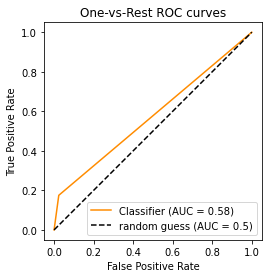

In [42]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(
    y_valid_,
    yhat,
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="random guess (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves")
plt.legend()
